<a href="https://colab.research.google.com/github/zackdihel/ECON-5200-Data-Analytics/blob/main/Assignment%201/ECON_5200_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Manual data
student_basket = [
    {'Item': 'Tuition', 'Price_2016':30000, 'Price_2025':40000},
    {'Item': 'Dunkin iced coffee', 'Price_2016':2.60, 'Price_2025':3.99},
    {'Item': 'Macbook Pro', 'Price_2016':1299, 'Price_2025':1599},
    {'Item': 'Pizza', 'Price_2016':16, 'Price_2025':18}
]

In [3]:
#Define the loop
def calculate_inflation(base,current):
  return ((current-base)/base)*100

#Run loop
for item in student_basket:
  rate = calculate_inflation(item['Price_2016'], item['Price_2025'])
  print(f"{item['Item']}: {rate:.2f}% Inflation")

Tuition: 33.33% Inflation
Dunkin iced coffee: 53.46% Inflation
Macbook Pro: 23.09% Inflation
Pizza: 12.50% Inflation


In [4]:
!pip install fredapi
from fredapi import Fred
fred = Fred(api_key = '*')

official_cpi = fred.get_series('CPIAUCSL')
tuition = fred.get_series('CUSR0000SEEB')
pizza = fred.get_series('CUSR0000SEFV')
dunkin = fred.get_series('CUSR0000SEFP01')
macbook = fred.get_series('CUSR0000SEEE01')

df = pd.DataFrame({"CPI": official_cpi, "Tuition": tuition, "Pizza": pizza,
                   "Dunkin": dunkin, "Macbook": macbook})

df = df.dropna()

a Data Frame is created with FRED data for each of my categories, and null values have been removed.

In [5]:
df

,CPI,Tuition,Pizza,Dunkin,Macbook
2005-01-01,191.600,428.300,190.800,151.700,155.700
2005-02-01,192.400,430.700,191.400,153.800,151.000
2005-03-01,193.100,433.000,191.700,153.500,149.400
2005-04-01,193.700,435.400,192.100,160.600,147.900
2005-05-01,193.600,438.100,192.600,161.600,146.500
...,...,...,...,...,...
2025-07-01,322.132,893.568,383.808,270.290,35.273
2025-08-01,323.364,895.305,384.909,280.100,35.064
2025-09-01,324.368,897.302,385.451,279.769,35.141
2025-11-01,325.031,902.001,387.202,285.370,34.184


In [6]:
print(df.head())
print(df.tail())

              CPI  Tuition  Pizza  Dunkin  Macbook
2005-01-01  191.6    428.3  190.8   151.7    155.7
2005-02-01  192.4    430.7  191.4   153.8    151.0
2005-03-01  193.1    433.0  191.7   153.5    149.4
2005-04-01  193.7    435.4  192.1   160.6    147.9
2005-05-01  193.6    438.1  192.6   161.6    146.5
                CPI  Tuition    Pizza   Dunkin  Macbook
2025-07-01  322.132  893.568  383.808  270.290   35.273
2025-08-01  323.364  895.305  384.909  280.100   35.064
2025-09-01  324.368  897.302  385.451  279.769   35.141
2025-11-01  325.031  902.001  387.202  285.370   34.184
2025-12-01  326.030  903.402  389.889  290.895   33.730


This will edit df so it only contains values from 2016-2025 which is the time period we care about.

In [7]:
df = df.loc['2016-01-01':'2025-12-31']

In [8]:
df

,CPI,Tuition,Pizza,Dunkin,Macbook
2016-01-01,237.652,699.997,259.958,202.882,45.424
2016-02-01,237.336,701.688,260.319,201.770,45.249
2016-03-01,238.080,703.289,260.883,200.018,45.269
2016-04-01,238.992,704.842,261.517,199.833,45.282
2016-05-01,239.557,706.506,262.074,200.845,44.853
...,...,...,...,...,...
2025-07-01,322.132,893.568,383.808,270.290,35.273
2025-08-01,323.364,895.305,384.909,280.100,35.064
2025-09-01,324.368,897.302,385.451,279.769,35.141
2025-11-01,325.031,902.001,387.202,285.370,34.184


In [9]:
display(df.head())
display(df.tail())

,CPI,Tuition,Pizza,Dunkin,Macbook
2016-01-01,237.652,699.997,259.958,202.882,45.424
2016-02-01,237.336,701.688,260.319,201.770,45.249
2016-03-01,238.080,703.289,260.883,200.018,45.269
2016-04-01,238.992,704.842,261.517,199.833,45.282
2016-05-01,239.557,706.506,262.074,200.845,44.853


,CPI,Tuition,Pizza,Dunkin,Macbook
2025-07-01,322.132,893.568,383.808,270.290,35.273
2025-08-01,323.364,895.305,384.909,280.100,35.064
2025-09-01,324.368,897.302,385.451,279.769,35.141
2025-11-01,325.031,902.001,387.202,285.370,34.184
2025-12-01,326.030,903.402,389.889,290.895,33.730


This formula action will go through df column by column and do the Value indexing calculation, and then return all indexed values to a new data frame

In [10]:
def calculate_index(series, start_date):
  # Get the value at the start date for the series
  start_value = series.loc[start_date]
  # Calculate the index for the entire series
  indexed_series = (series / start_value) * 100
  return indexed_series

indexed_data = {}

# Loop through each column of the DataFrame
for column_name in df.columns:
    series = df[column_name]
    indexed_series = calculate_index(series, '2016-01-01')
    indexed_data[column_name] = indexed_series

indexed_df = pd.DataFrame(indexed_data)

display(indexed_df.head())
display(indexed_df.tail())

,CPI,Tuition,Pizza,Dunkin,Macbook
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.138869,99.451898,99.614741
2016-03-01,100.180095,100.470288,100.355827,98.588342,99.658771
2016-04-01,100.563850,100.692146,100.599712,98.497156,99.687390
2016-05-01,100.801592,100.929861,100.813978,98.995968,98.742955


,CPI,Tuition,Pizza,Dunkin,Macbook
2025-07-01,135.547776,127.653119,147.642311,133.225225,77.652783
2025-08-01,136.066181,127.901262,148.065841,138.060548,77.192673
2025-09-01,136.488647,128.186549,148.274337,137.897398,77.362187
2025-11-01,136.767627,128.857838,148.947907,140.658117,75.255372
2025-12-01,137.187989,129.057982,149.981535,143.381374,74.255900


Plots the price changes for each item since 2016

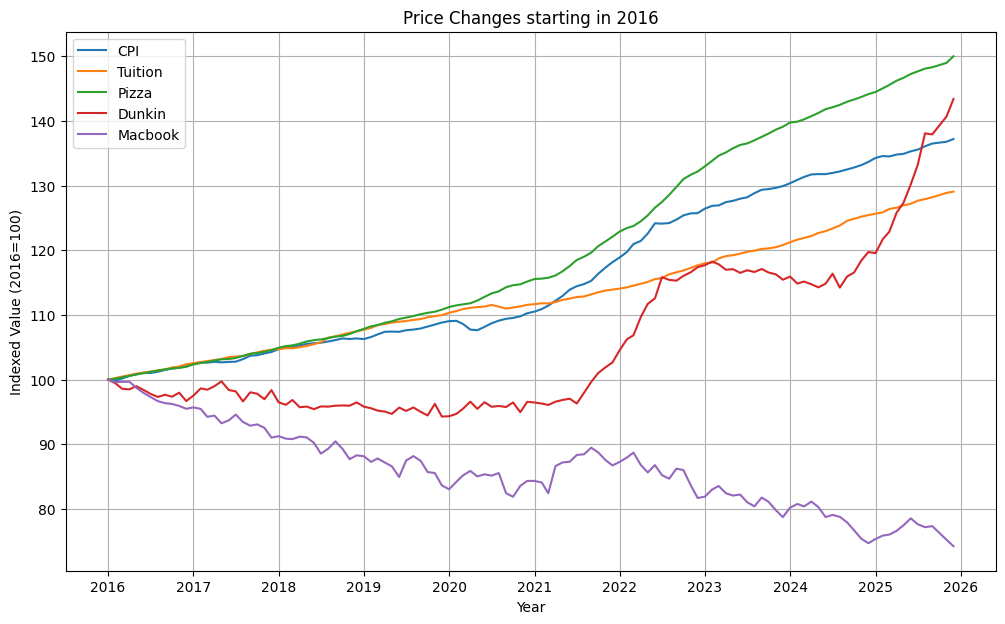

In [11]:
#plotting the indexed data
plt.figure(figsize=(12, 7))
for column in indexed_df.columns:
    plt.plot(indexed_df.index, indexed_df[column], label=column)

plt.title('Price Changes starting in 2016')
plt.xlabel('Year')
plt.ylabel('Indexed Value (2016=100)')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
weights = {
    'Tuition': 0.4,
    'Pizza': 0.2,
    'Dunkin': 0.1,
    'Macbook': 0.3
}

indexed_df['Student_SPI'] = 0.0

#calculate the weighted sum for 'Student_SPI'
for item, weight in weights.items():
    if item in indexed_df.columns:
        indexed_df['Student_SPI'] += indexed_df[item] * weight

display(indexed_df.head())
display(indexed_df.tail())

,CPI,Tuition,Pizza,Dunkin,Macbook,Student_SPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.138869,99.451898,99.614741,99.954015
2016-03-01,100.180095,100.470288,100.355827,98.588342,99.658771,100.015746
2016-04-01,100.563850,100.692146,100.599712,98.497156,99.687390,100.152733
2016-05-01,100.801592,100.929861,100.813978,98.995968,98.742955,100.057223


,CPI,Tuition,Pizza,Dunkin,Macbook,Student_SPI
2025-07-01,135.547776,127.653119,147.642311,133.225225,77.652783,117.208067
2025-08-01,136.066181,127.901262,148.065841,138.060548,77.192673,117.737530
2025-09-01,136.488647,128.186549,148.274337,137.897398,77.362187,117.927883
2025-11-01,136.767627,128.857838,148.947907,140.658117,75.255372,117.975140
2025-12-01,137.187989,129.057982,149.981535,143.381374,74.255900,118.234407


Plots the weighted SPI against the CPI and highlights the gap -- good chart

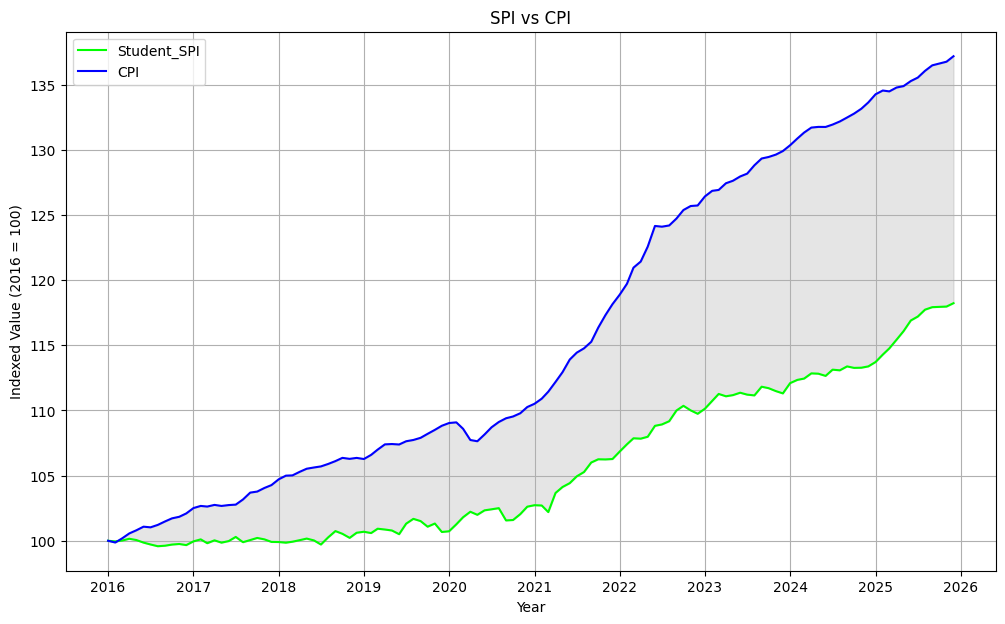

In [28]:
plt.figure(figsize=(12, 7))
plt.plot(indexed_df.index, indexed_df['Student_SPI'], label='Student_SPI', color='lime')
plt.plot(indexed_df.index, indexed_df['CPI'], label='CPI', color = 'blue')
plt.fill_between(indexed_df.index, indexed_df['Student_SPI'], indexed_df['CPI'], color='gray', alpha=0.2)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Indexed Value (2016 = 100)')
plt.title('SPI vs CPI')
plt.grid(True)
plt.show()

Wrong chart -- non-normalized

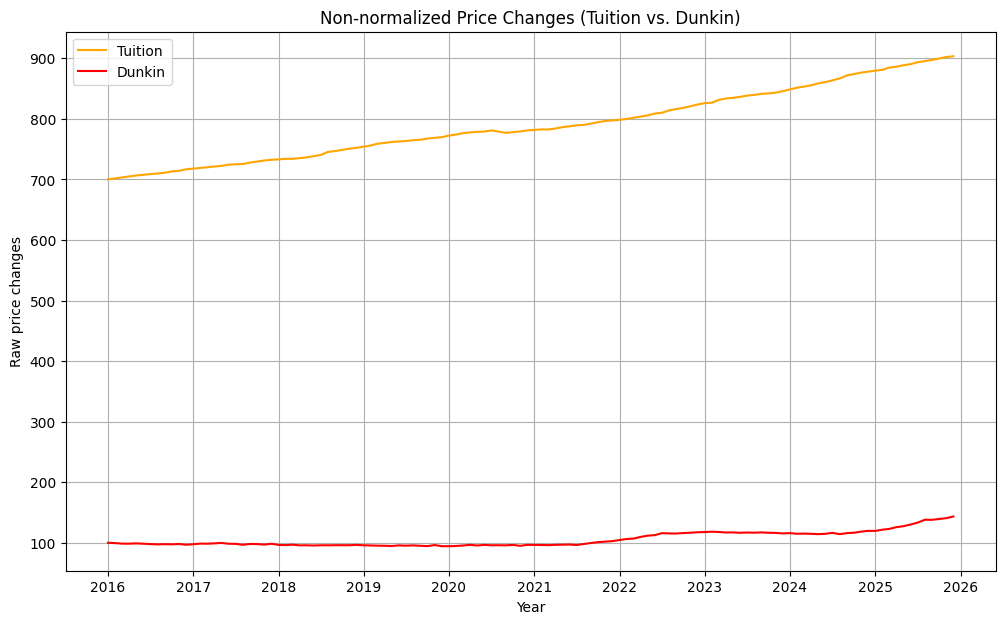

In [31]:
plt.figure(figsize=(12, 7))
plt.plot(df.index, df['Tuition'], label='Tuition', color='orange')
plt.plot(df.index, indexed_df['Dunkin'], label='Dunkin', color = 'red')
plt.legend()
plt.title('Non-normalized Price Changes (Tuition vs. Dunkin)')
plt.xlabel('Year')
plt.ylabel('Raw price changes')
plt.grid(True)
plt.show()

This is a poor visualization of the data because the raw values of Tuition and Dunkin Donuts medium iced coffee are completely different from each other and are operating on incomparable scales. Even though both are going through price changes, we can't really see that or understand the scale of it. By indexing our values to the same starting point we can see how each item's value has changed relative to each other

# Task
Find the FRED series ID for 'Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton, MA (CBSA)' using `fred.search()`.

## Find Boston CPI FRED Code

### Subtask:
Use the `fredapi` library to search for the FRED series ID for 'Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton, MA (CBSA)'. This is a prerequisite for fetching the data.


**Reasoning**:
To find the FRED series ID for the Boston CPI, I will use the `fred.search()` function with the provided query string.



In [34]:
boston_cpi_search = fred.search('Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton, MA (CBSA)')
print(boston_cpi_search)

                            id realtime_start realtime_end  \
series id                                                    
APUS11A72610      APUS11A72610     2026-01-24   2026-01-24   
CUURA103SEHA      CUURA103SEHA     2026-01-24   2026-01-24   
CUURA103SA0        CUURA103SA0     2026-01-24   2026-01-24   
CUUSA103SA0        CUUSA103SA0     2026-01-24   2026-01-24   
CUUSA103SEHA      CUUSA103SEHA     2026-01-24   2026-01-24   
...                        ...            ...          ...   
CUUSA103SAN        CUUSA103SAN     2026-01-24   2026-01-24   
CUURA103SACL11  CUURA103SACL11     2026-01-24   2026-01-24   
CUUSA103SACL11  CUUSA103SACL11     2026-01-24   2026-01-24   
CUUSA103SANL11  CUUSA103SANL11     2026-01-24   2026-01-24   
CUURA103SANL11  CUURA103SANL11     2026-01-24   2026-01-24   

                                                            title  \
series id                                                           
APUS11A72610    Average Price: Electricity per Kilowatt

**Reasoning**:
From the search results, the series ID 'CUURA103SEHA' appears to be the most appropriate for the 'Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton, MA (CBSA)' with a monthly frequency and not seasonally adjusted.



In [35]:
boston_cpi = fred.get_series('CUURA103SEHA')
print(boston_cpi.head())
print(boston_cpi.tail())

1914-12-01    16.2
1915-01-01     NaN
1915-02-01     NaN
1915-03-01     NaN
1915-04-01     NaN
dtype: float64
2025-08-01    474.544
2025-09-01    476.913
2025-10-01        NaN
2025-11-01    480.236
2025-12-01    481.998
dtype: float64


**Reasoning**:
Now that the Boston CPI data has been fetched, the next step is to add it as a new column to the existing DataFrame `df` and then remove any rows that contain `NaN` values to maintain data consistency, similar to how the initial `df` was handled. Afterwards, the head and tail of the updated DataFrame will be displayed to confirm the changes.



In [36]:
df['Boston_CPI'] = boston_cpi
df = df.dropna()

display(df.head())
display(df.tail())

/tmp/ipython-input-3120465715.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Boston_CPI'] = boston_cpi


,CPI,Tuition,Pizza,Dunkin,Macbook,Boston_CPI
2016-01-01,237.652,699.997,259.958,202.882,45.424,316.450
2016-02-01,237.336,701.688,260.319,201.770,45.249,317.566
2016-03-01,238.080,703.289,260.883,200.018,45.269,318.623
2016-04-01,238.992,704.842,261.517,199.833,45.282,319.968
2016-05-01,239.557,706.506,262.074,200.845,44.853,321.556


,CPI,Tuition,Pizza,Dunkin,Macbook,Boston_CPI
2025-07-01,322.132,893.568,383.808,270.290,35.273,476.161
2025-08-01,323.364,895.305,384.909,280.100,35.064,474.544
2025-09-01,324.368,897.302,385.451,279.769,35.141,476.913
2025-11-01,325.031,902.001,387.202,285.370,34.184,480.236
2025-12-01,326.030,903.402,389.889,290.895,33.730,481.998


**Reasoning**:
To explicitly avoid the `SettingWithCopyWarning` when assigning a new column, I will use `.loc` for column assignment to ensure the operation is performed on the original DataFrame or a direct copy.



In [37]:
df.loc[:, 'Boston_CPI'] = boston_cpi
df = df.dropna()

display(df.head())
display(df.tail())

,CPI,Tuition,Pizza,Dunkin,Macbook,Boston_CPI
2016-01-01,237.652,699.997,259.958,202.882,45.424,316.450
2016-02-01,237.336,701.688,260.319,201.770,45.249,317.566
2016-03-01,238.080,703.289,260.883,200.018,45.269,318.623
2016-04-01,238.992,704.842,261.517,199.833,45.282,319.968
2016-05-01,239.557,706.506,262.074,200.845,44.853,321.556


,CPI,Tuition,Pizza,Dunkin,Macbook,Boston_CPI
2025-07-01,322.132,893.568,383.808,270.290,35.273,476.161
2025-08-01,323.364,895.305,384.909,280.100,35.064,474.544
2025-09-01,324.368,897.302,385.451,279.769,35.141,476.913
2025-11-01,325.031,902.001,387.202,285.370,34.184,480.236
2025-12-01,326.030,903.402,389.889,290.895,33.730,481.998


## Re-index Boston CPI

### Subtask:
Apply the `calculate_index` function (already defined in the notebook) to the fetched Boston CPI series, using '2016-01-01' as the base date, so that its value at that date is 100.


**Reasoning**:
To index the Boston CPI, I will apply the `calculate_index` function to the 'Boston_CPI' column of the `df` DataFrame and add it to `indexed_df` as a new column, then display the head and tail of the updated `indexed_df` to confirm the indexing.



In [41]:
indexed_boston_cpi = calculate_index(df['Boston_CPI'], '2016-01-01')
indexed_df['Boston_CPI'] = indexed_boston_cpi

display(indexed_df.head())
display(indexed_df.tail())

,CPI,Tuition,Pizza,Dunkin,Macbook,Student_SPI,Boston_CPI
2016-01-01,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2016-02-01,99.867032,100.241572,100.138869,99.451898,99.614741,99.954015,100.352662
2016-03-01,100.180095,100.470288,100.355827,98.588342,99.658771,100.015746,100.686680
2016-04-01,100.563850,100.692146,100.599712,98.497156,99.687390,100.152733,101.111708
2016-05-01,100.801592,100.929861,100.813978,98.995968,98.742955,100.057223,101.613525


,CPI,Tuition,Pizza,Dunkin,Macbook,Student_SPI,Boston_CPI
2025-07-01,135.547776,127.653119,147.642311,133.225225,77.652783,117.208067,150.469584
2025-08-01,136.066181,127.901262,148.065841,138.060548,77.192673,117.737530,149.958603
2025-09-01,136.488647,128.186549,148.274337,137.897398,77.362187,117.927883,150.707221
2025-11-01,136.767627,128.857838,148.947907,140.658117,75.255372,117.975140,151.757308
2025-12-01,137.187989,129.057982,149.981535,143.381374,74.255900,118.234407,152.314110


## Plot Inflation Indices

### Subtask:
Create a single line plot using `matplotlib` to visualize three series: 'CPI' (National CPI, grey), the newly indexed 'Boston CPI' (blue), and 'Student_SPI' (red). Ensure the plot has a title, axis labels, a grid, and a clear legend.


**Reasoning**:
I will create a single line plot to visualize the 'CPI', 'Boston_CPI', and 'Student_SPI' series from the `indexed_df` DataFrame, following the specified colors, labels, and plot enhancements like title, axis labels, legend, and grid.



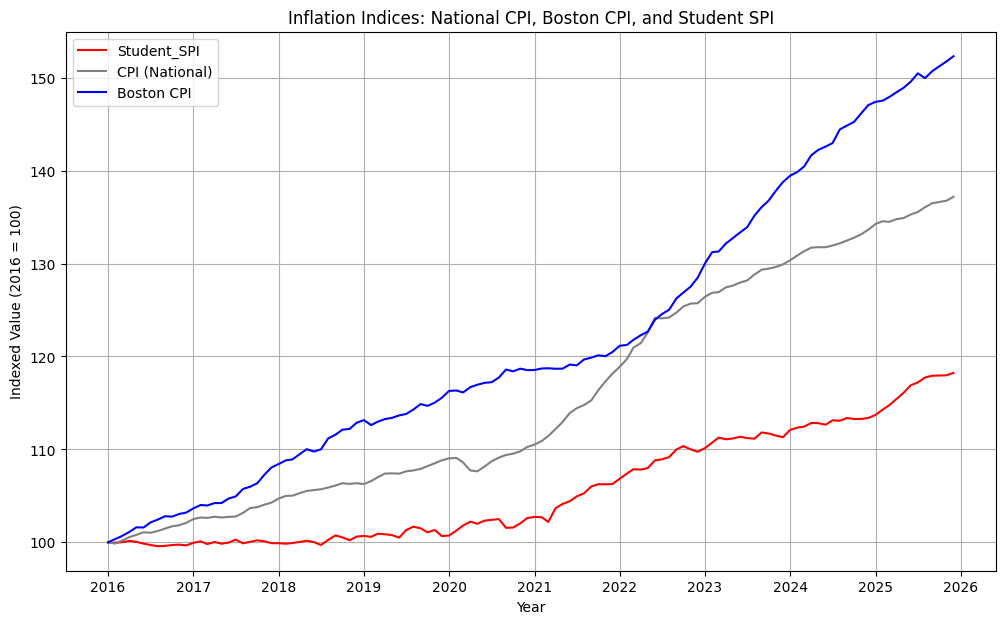

In [39]:
plt.figure(figsize=(12, 7))
plt.plot(indexed_df.index, indexed_df['Student_SPI'], label='Student_SPI', color='red')
plt.plot(indexed_df.index, indexed_df['CPI'], label='CPI (National)', color='gray')
plt.plot(indexed_df.index, indexed_df['Boston_CPI'], label='Boston CPI', color='blue')
plt.title('Inflation Indices: National CPI, Boston CPI, and Student SPI')
plt.xlabel('Year')
plt.ylabel('Indexed Value (2016 = 100)')
plt.legend()
plt.grid(True)
plt.show()

## Final Task

### Subtask:
Summarize the findings from the plot, comparing the trends of National CPI, Boston CPI, and Student SPI.


## Summary:

### Q&A
The final task asked for a summary of the findings from the plot, comparing the trends of National CPI, Boston CPI, and Student SPI. The provided solving process successfully prepared the data and generated the comparative plot, which is the prerequisite for this analysis. However, the explicit interpretation and comparison of the trends directly from the generated plot were not detailed in the provided solution steps' results.

### Data Analysis Key Findings
*   The FRED series ID for 'Consumer Price Index for All Urban Consumers: Boston-Cambridge-Newton, MA (CBSA)' was successfully identified as `CUURA103SEHA`.
*   The Boston CPI data was retrieved and integrated into the main DataFrame, and missing values were handled by dropping corresponding rows.
*   The Boston CPI series was successfully re-indexed using '2016-01-01' as the base date, setting its value to 100 at that point for consistent comparison with other indices.
*   A combined line plot was generated, visually presenting the indexed National CPI, Boston CPI, and Student SPI, providing a clear visualization for comparing their historical trends.

### Insights or Next Steps
*   The generated plot provides a direct visual basis for comparing the inflation trends across National CPI, Boston CPI, and Student SPI, which can now be analyzed to identify periods of divergence or convergence.
*   To obtain quantitative insights, the next step could involve calculating and comparing the average annual growth rates or cumulative percentage changes for each index over specific timeframes, especially since 2016.
